In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc
import warnings
import re
from nltk.corpus import stopwords
#import distance
from nltk.stem import PorterStemmer
warnings.filterwarnings("ignore")


In [3]:
train_total_df = pd.read_csv("/content/drive/My Drive/case_study2/new_train_total.csv")

print("Number of data points:",train_total_df.shape[0])

Number of data points: 297105


In [4]:
dev_total_df = pd.read_csv("/content/drive/My Drive/case_study2/new_dev_total.csv")

print("Number of data points:",dev_total_df.shape[0])

Number of data points: 44608


In [5]:
test_total_df = pd.read_csv("/content/drive/My Drive/case_study2/new_test_total.csv")

print("Number of data points:",test_total_df.shape[0])

Number of data points: 79857


In [6]:
test_total_df.head()

,Unnamed: 0,Unnamed: 0.1,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,date,Super_Bowl_Day,Labor_Day,Thanksgiving_Day,Christmas_Day,Next_Week_Of_Thanksgiving,Next_Holiday_Week_Of_Thanksgiving,Next_Week_Of_Christmas,week_of_year,month_of_year,before_Christmas_Day,low_sales_dep
0,0,116,1,1,2012-04-27,16347.60,False,67.23,3.814,3221.25,0.0,35.49,577.14,6222.25,221.617937,7.143,False,A,151315,1335484800,0,0,0,0,0,0,0,17,4,0,0
1,1,259,1,2,2012-04-27,45456.23,False,67.23,3.814,3221.25,0.0,35.49,577.14,6222.25,221.617937,7.143,False,A,151315,1335484800,0,0,0,0,0,0,0,17,4,0,0
2,2,402,1,3,2012-04-27,8635.62,False,67.23,3.814,3221.25,0.0,35.49,577.14,6222.25,221.617937,7.143,False,A,151315,1335484800,0,0,0,0,0,0,0,17,4,0,0
3,3,545,1,4,2012-04-27,36894.54,False,67.23,3.814,3221.25,0.0,35.49,577.14,6222.25,221.617937,7.143,False,A,151315,1335484800,0,0,0,0,0,0,0,17,4,0,0
4,4,688,1,5,2012-04-27,17170.39,False,67.23,3.814,3221.25,0.0,35.49,577.14,6222.25,221.617937,7.143,False,A,151315,1335484800,0,0,0,0,0,0,0,17,4,0,0


In [0]:
test_total_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Store', 'Dept', 'Date', 'Weekly_Sales',
       'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday_y', 'Type', 'Size', 'date', 'Super_Bowl_Day', 'Labor_Day',
       'Thanksgiving_Day', 'Christmas_Day', 'Next_Week_Of_Thanksgiving',
       'Next_Holiday_Week_Of_Thanksgiving', 'Next_Week_Of_Christmas',
       'week_of_year', 'month_of_year', 'before_Christmas_Day',
       'low_sales_dep'],
      dtype='object')

In [7]:
#we need to do one hot 

from sklearn.preprocessing import OneHotEncoder 

onehotencoder = OneHotEncoder() 
onehotencoder.fit(train_total_df[['Store']])

train_store_one_hot=onehotencoder.transform(train_total_df[['Store']])
dev_store_one_hot=onehotencoder.transform(dev_total_df[['Store']])
test_store_one_hot=onehotencoder.transform(test_total_df[['Store']])

print("Shape of matrix after one hot encodig ",train_store_one_hot.shape)

Shape of matrix after one hot encodig  (297105, 45)


In [8]:
dept_onehotencoder = OneHotEncoder() 
dept_onehotencoder.fit(train_total_df[['Dept']])

train_dept_one_hot=dept_onehotencoder.transform(train_total_df[['Dept']])
dev_dept_one_hot=dept_onehotencoder.transform(dev_total_df[['Dept']])
test_dept_one_hot=dept_onehotencoder.transform(test_total_df[['Dept']])

print("Shape of matrix after one hot encodig ",train_dept_one_hot.shape)

Shape of matrix after one hot encodig  (297105, 81)


In [0]:
def replace_holiday(data):
    holiday=data.replace(to_replace=[False],value=0)
    holiday=holiday.replace(to_replace=[True],value=1)
    return holiday

In [0]:
train_holiday=replace_holiday(train_total_df[['IsHoliday']])
dev_holiday=replace_holiday(dev_total_df[['IsHoliday']])
test_holiday=replace_holiday(test_total_df[['IsHoliday']])

In [0]:
train_holiday

,IsHoliday
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
297100,0.0
297101,0.0
297102,0.0
297103,0.0


In [0]:
from sklearn.preprocessing import StandardScaler


def do_StandardScaler(train,dev,test):
    Standardscaler = StandardScaler()

    Standardscaler.fit(train.values.reshape(-1,1))

    train_number = Standardscaler.transform(train.values.reshape(-1,1))
    dev_number   = Standardscaler.transform(dev.values.reshape(-1,1))
    test_number  = Standardscaler.transform(test.values.reshape(-1,1))

    print(train_number.shape)
    
    return train_number,dev_number,test_number


In [12]:
train_temperature,dev_temperature,test_temperature    \
   = do_StandardScaler(train_total_df['Temperature'],dev_total_df['Temperature'],test_total_df['Temperature'])

(297105, 1)


In [13]:
train_fuel_price,dev_fuel_price,test_fuel_price    \
   = do_StandardScaler(train_total_df['Fuel_Price'],dev_total_df['Fuel_Price'],test_total_df['Fuel_Price'])

(297105, 1)


In [14]:
train_markdown1,dev_markdown1,test_markdown1   \
   = do_StandardScaler(train_total_df['MarkDown1'],dev_total_df['MarkDown1'],test_total_df['MarkDown1'])

train_markdown2,dev_markdown2,test_markdown2   \
   = do_StandardScaler(train_total_df['MarkDown2'],dev_total_df['MarkDown2'],test_total_df['MarkDown2'])

train_markdown3,dev_markdown3,test_markdown3   \
   = do_StandardScaler(train_total_df['MarkDown3'],dev_total_df['MarkDown3'],test_total_df['MarkDown3'])

train_markdown4,dev_markdown4,test_markdown4   \
   = do_StandardScaler(train_total_df['MarkDown4'],dev_total_df['MarkDown4'],test_total_df['MarkDown4'])

train_markdown5,dev_markdown5,test_markdown5   \
   = do_StandardScaler(train_total_df['MarkDown5'],dev_total_df['MarkDown5'],test_total_df['MarkDown5'])

(297105, 1)
(297105, 1)
(297105, 1)
(297105, 1)
(297105, 1)


In [15]:
train_cpi,dev_cpi,test_cpi    \
   = do_StandardScaler(train_total_df['CPI'],dev_total_df['CPI'],test_total_df['CPI'])

(297105, 1)


In [16]:
train_unemployment,dev_unemployment,test_unemployment   \
   = do_StandardScaler(train_total_df['Unemployment'],dev_total_df['Unemployment'],test_total_df['Unemployment'])

(297105, 1)


In [17]:
type_onehotencoder = OneHotEncoder() 
type_onehotencoder.fit(train_total_df[['Type']])

train_type_one_hot=type_onehotencoder.transform(train_total_df[['Type']])
dev_type_one_hot=type_onehotencoder.transform(dev_total_df[['Type']])
test_type_one_hot=type_onehotencoder.transform(test_total_df[['Type']])

print("Shape of matrix after one hot encodig ",train_type_one_hot.shape)

Shape of matrix after one hot encodig  (297105, 3)


In [18]:
train_size,dev_size,test_size   \
   = do_StandardScaler(train_total_df['Size'],dev_total_df['Size'],test_total_df['Size'])

(297105, 1)


In [19]:
week_of_year_onehotencoder = OneHotEncoder() 
week_of_year_onehotencoder.fit(train_total_df[['week_of_year']])

train_week_of_year_one_hot=week_of_year_onehotencoder.transform(train_total_df[['week_of_year']])
dev_week_of_year_one_hot=week_of_year_onehotencoder.transform(dev_total_df[['week_of_year']])
test_week_of_year_one_hot=week_of_year_onehotencoder.transform(test_total_df[['week_of_year']])

print("Shape of matrix after one hot encodig ",train_week_of_year_one_hot.shape)

Shape of matrix after one hot encodig  (297105, 52)


In [20]:


month_of_year_onehotencoder = OneHotEncoder() 
month_of_year_onehotencoder.fit(train_total_df[['month_of_year']])

train_month_of_year_one_hot=month_of_year_onehotencoder.transform(train_total_df[['month_of_year']])
dev_month_of_year_one_hot=month_of_year_onehotencoder.transform(dev_total_df[['month_of_year']])
test_month_of_year_one_hot=month_of_year_onehotencoder.transform(test_total_df[['month_of_year']])

print("Shape of matrix after one hot encodig ",train_month_of_year_one_hot.shape)

Shape of matrix after one hot encodig  (297105, 12)


In [0]:
def get_graph(train_df,predict_df):
  ts = train_df.groupby('Date')['Weekly_Sales'].sum().reset_index()
  ts = ts.set_index('Date')


  ts1 = predict_df.groupby('Date')['Weekly_Sales'].sum().reset_index()
  ts1 = ts1.set_index('Date')

  r=train_df[train_df['IsHoliday']==True]

  r=r['Date'].drop_duplicates() 

  holiday_date_=[]
  for i in r:
    holiday_date_.append(i)

  holiday_date=[]
  holiday_sale=[]
  k=0
  for i in ts.iterrows():
    if i[0] in holiday_date_:
        holiday_date.append(k)
        holiday_sale.append(i[1]['Weekly_Sales'])
    k=k+1


  ts.plot(figsize=(10,5),marker='o')
  plt.plot(holiday_date,holiday_sale,color='red',marker='o')
  ts1.plot(figsize=(10,5),marker='o')
  plt.plot(holiday_date,holiday_sale,color='red',marker='o')



In [0]:
def weighted_mean_absolute_error(act_val,pred_val,holiday_list):
  weight=0
  temp_val=0
  sum_wt=0
  holiday_list=holiday_list.values.tolist()
  act_val=act_val.values.tolist()
  
  for i in range(len(act_val)):
    if holiday_list[i][0] == 0.0:
      weight=1
    else:
      weight=5

    sum_wt=sum_wt+weight
    temp_val=temp_val + (abs(act_val[i][0]-pred_val[i]) * weight)
    

  return temp_val/sum_wt

In [0]:
['Unnamed: 0', 'Unnamed: 0.1', 'Store', 'Dept', 'Date', 'Weekly_Sales',
       'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type',
       'Size', 'date', 'Super_Bowl_Day', 'Labor_Day', 'Thanksgiving_Day',
       'Christmas_Day', 'Next_Week_Of_Thanksgiving',
       'Next_Holiday_Week_Of_Thanksgiving', 'Next_Week_Of_Christmas',
       'week_of_year', 'month_of_year']

In [23]:
from scipy.sparse import hstack

X_train = hstack((train_store_one_hot,train_dept_one_hot,train_holiday,train_temperature,  \
                 train_fuel_price,train_markdown1,train_markdown2,train_markdown3,train_markdown4,  \
                  train_markdown5,train_cpi,train_unemployment,train_type_one_hot,train_size  ,  \
                  train_total_df[['date']],train_total_df[['Super_Bowl_Day']],  \
                  train_total_df[['Labor_Day']],train_total_df[['Thanksgiving_Day']],  \
                  train_total_df[['Christmas_Day']],train_total_df[['Next_Week_Of_Thanksgiving']],  \
                  train_total_df[['Next_Holiday_Week_Of_Thanksgiving']],train_total_df[['Next_Week_Of_Christmas']],  \
                  train_week_of_year_one_hot,train_month_of_year_one_hot,train_total_df[['before_Christmas_Day']],  \
                  train_total_df[['low_sales_dep']]
                 )).tocsr()


print("Train data: ",X_train.shape)

X_dev = hstack((dev_store_one_hot,dev_dept_one_hot,dev_holiday,dev_temperature,  \
                 dev_fuel_price,dev_markdown1,dev_markdown2,dev_markdown3,dev_markdown4,  \
                  dev_markdown5,dev_cpi,dev_unemployment,dev_type_one_hot,dev_size  ,  \
                  dev_total_df[['date']],dev_total_df[['Super_Bowl_Day']],  \
                  dev_total_df[['Labor_Day']],dev_total_df[['Thanksgiving_Day']],  \
                  dev_total_df[['Christmas_Day']],dev_total_df[['Next_Week_Of_Thanksgiving']],  \
                  dev_total_df[['Next_Holiday_Week_Of_Thanksgiving']],dev_total_df[['Next_Week_Of_Christmas']],  \
                  dev_week_of_year_one_hot,dev_month_of_year_one_hot,dev_total_df[['before_Christmas_Day']],  \
                  dev_total_df[['low_sales_dep']]
                 )).tocsr()

print("Dev data: ",X_dev.shape)


X_test = hstack((test_store_one_hot,test_dept_one_hot,test_holiday,test_temperature,  \
                 test_fuel_price,test_markdown1,test_markdown2,test_markdown3,test_markdown4,  \
                  test_markdown5,test_cpi,test_unemployment,test_type_one_hot,test_size  ,  \
                  test_total_df[['date']],test_total_df[['Super_Bowl_Day']],  \
                  test_total_df[['Labor_Day']],test_total_df[['Thanksgiving_Day']],  \
                  test_total_df[['Christmas_Day']],test_total_df[['Next_Week_Of_Thanksgiving']],  \
                  test_total_df[['Next_Holiday_Week_Of_Thanksgiving']],test_total_df[['Next_Week_Of_Christmas']],  \
                  test_week_of_year_one_hot,test_month_of_year_one_hot,test_total_df[['before_Christmas_Day']],  \
                  test_total_df[['low_sales_dep']]
                 )).tocsr()

print("Test data: ",X_test.shape)

Train data:  (297105, 214)
Dev data:  (44608, 214)
Test data:  (79857, 214)


In [24]:
Y_train=train_total_df[['Weekly_Sales']]
print("train data: ",Y_train.shape)
Y_dev  =dev_total_df[['Weekly_Sales']]
print("dev data: ",Y_dev.shape)
Y_test =test_total_df[['Weekly_Sales']]
print("Test data: ",Y_test.shape)

train data:  (297105, 1)
dev data:  (44608, 1)
Test data:  (79857, 1)


## Using Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

lr_reg=LinearRegression()
lr_reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
Y_pred = lr_reg.predict(X_test)

In [0]:
print("The MAE for  LinearRegression : ",mean_absolute_error(Y_test,Y_pred))

The MAE for  LinearRegression :  15743.896105056981


In [0]:
Y_dev_pred = lr_reg.predict(X_dev)
dev_predictions = [value for value in Y_dev_pred]
Y_test_pred = lr_reg.predict(X_test)
test_predictions = [value for value in Y_test_pred]

In [0]:
dev_error=weighted_mean_absolute_error(Y_dev,dev_predictions,dev_holiday)
dev_error

array([18670.29059426])

In [0]:
test_error=weighted_mean_absolute_error(Y_test,test_predictions,test_holiday)
test_error

array([15794.14709949])

In [0]:
df_dev_error=pd.DataFrame(dev_predictions,columns=['Weekly_Sales'])
df_test_error=pd.DataFrame(test_predictions,columns=['Weekly_Sales'])

result_dev = pd.concat([df_dev_error,dev_total_df[['Date']]], axis=1)
result_test = pd.concat([df_test_error,test_total_df[['Date']]], axis=1)

frames1 = [result_dev, result_test]
frames2 = [dev_total_df, test_total_df]

result = pd.concat(frames1)
actual = pd.concat(frames2)

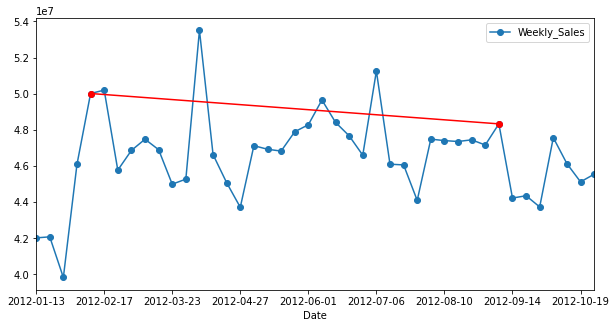

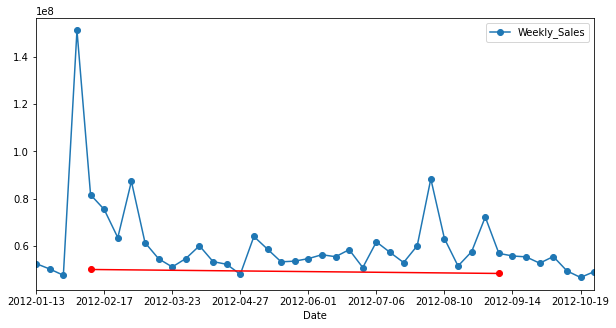

In [0]:
get_graph(actual,result)

## Using Random Forest Regressor

In [0]:
def my_custom_loss_func(act_val,pred_val):
  weight=0
  temp_val=0
  sum_wt=0
  holiday_list=train_holiday.values.tolist()
  act_val=act_val.values.tolist()
  
  for i in range(len(act_val)):
    if holiday_list[i][0] == 0.0:
      weight=1
    else:
      weight=5

    sum_wt=sum_wt+weight

    temp_val=temp_val + (abs(act_val[i][0]-pred_val[i]) * weight)
    

  return temp_val/sum_wt


In [0]:
from sklearn.metrics.scorer import make_scorer

my_scorer= make_scorer(my_custom_loss_func, greater_is_better=False)

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

clf=RandomForestRegressor()  
parameters={'n_estimators':[50, 100, 150, 200,250,300],'max_depth':[10,15,17,20,22,25,27,30,35],
           'min_samples_leaf':[2, 3, 4, 5, 7,9],'min_samples_split':[2, 3, 4, 5,6]}
model = RandomizedSearchCV(clf, parameters,scoring=my_scorer,n_jobs=-1)
model.fit(X_train, Y_train)

In [0]:
print("Best cross-validation score: {:.2f}".format(model.best_score_))
print("Best parameters: ", model.best_params_)

Best cross-validation score: -5494.46
Best parameters:  {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 22}


In [26]:
from sklearn.ensemble import RandomForestRegressor
regr1 = RandomForestRegressor(min_samples_leaf=5,min_samples_split=2,n_estimators=150,max_depth=22)
regr1.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=22, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
Y_dev_pred = regr1.predict(X_dev)
dev_predictions = [value for value in Y_dev_pred]
Y_test_pred = regr1.predict(X_test)
test_predictions = [value for value in Y_test_pred]

In [28]:
dev_error=weighted_mean_absolute_error(Y_dev,dev_predictions,dev_holiday)
dev_error

5142.7788421119585

In [29]:
test_error=weighted_mean_absolute_error(Y_test,test_predictions,test_holiday)
test_error

5335.562153176323

In [0]:
df_dev_error=pd.DataFrame(dev_predictions,columns=['Weekly_Sales'])
df_test_error=pd.DataFrame(test_predictions,columns=['Weekly_Sales'])

result_dev = pd.concat([df_dev_error,dev_total_df[['Date']]], axis=1)
result_test = pd.concat([df_test_error,test_total_df[['Date']]], axis=1)

frames1 = [result_dev, result_test]
frames2 = [dev_total_df, test_total_df]

result = pd.concat(frames1)
actual = pd.concat(frames2)

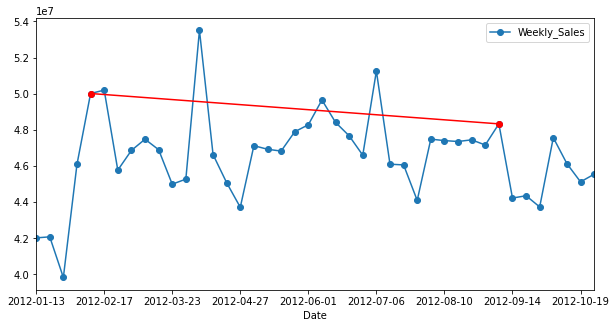

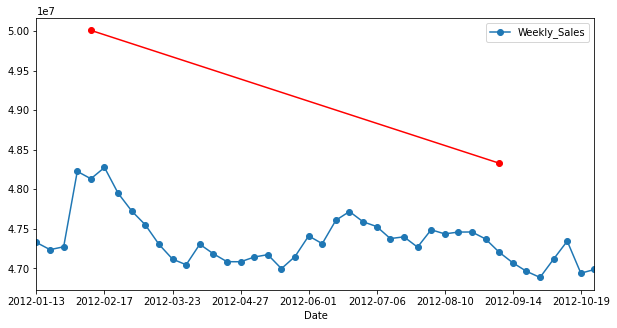

In [31]:
get_graph(actual,result)

In [32]:

print (regr1.feature_importances_)

[3.84750503e-03 1.81711042e-03 2.86012445e-03 3.07353949e-03
 8.04382304e-06 1.65941906e-03 1.77121959e-04 1.37850605e-04
 5.60421028e-04 2.04160869e-02 2.60059516e-03 1.30823383e-04
 1.41050391e-03 6.00345991e-03 5.31347163e-04 1.33544487e-04
 1.19868951e-03 1.06718838e-03 7.69888625e-04 4.11628491e-03
 5.60677214e-04 9.15338571e-04 1.92973538e-03 9.47134484e-04
 1.25478431e-04 2.10864067e-03 1.77932509e-03 4.53095119e-04
 1.55387709e-04 1.44103124e-04 7.79909947e-04 1.47068782e-03
 1.25253447e-03 3.66665452e-05 1.17707108e-03 1.50860953e-03
 5.37011426e-04 6.09378971e-05 3.44004927e-04 3.77453916e-04
 4.80350593e-04 1.33421765e-03 2.22081608e-03 4.47603254e-04
 2.08471396e-04 5.66812543e-03 3.62459720e-02 0.00000000e+00
 1.14569526e-02 9.29340179e-03 0.00000000e+00 1.34105067e-02
 1.65959329e-02 7.25922270e-03 5.58737044e-03 5.33430178e-05
 0.00000000e+00 1.69376686e-02 3.57156278e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

# **Using Xgboost**

In [0]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV


clf_xgb = xgb.XGBRegressor()
param_dist = {'n_estimators': [50,100,150,200,250,300],
              'learning_rate':[0.01,0.05,0.1,0.2,0.3,0.5],
              'subsample': [0.3,0.5,0.7,0.9],
              'max_depth': [7,10,15,20,22,25,27,30,35],
              'colsample_bytree': [0.4,0.5,0.7],
              'min_child_weight': [1, 2, 3, 4,5,6]
             }

model = RandomizedSearchCV(clf_xgb, param_dist,scoring=my_scorer, n_jobs=-1)
model.fit(X_train, Y_train)

[05:44:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alp...
                   param_distributions={'colsample_bytree': [0.4, 0.5, 0.7],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                               

In [0]:
print("Best cross-validation score: {:.2f}".format(model.best_score_))
print("Best parameters: ", model.best_params_)

Best cross-validation score: -2718.51
Best parameters:  {'subsample': 0.9, 'n_estimators': 250, 'min_child_weight': 4, 'max_depth': 20, 'learning_rate': 0.05, 'colsample_bytree': 0.5}


In [33]:
import xgboost as xgb
x_model = xgb.XGBRegressor(
 learning_rate =0.05,
 n_estimators=250,
 max_depth=20,
 min_child_weight=4,
 subsample=0.9,
 colsample_bytree=0.5)
x_model.fit(X_train, Y_train)

[03:41:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=20, min_child_weight=4, missing=None, n_estimators=250,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)

In [0]:
Y_dev_pred = x_model.predict(X_dev)
dev_predictions = [value for value in Y_dev_pred]
Y_test_pred = x_model.predict(X_test)
test_predictions = [value for value in Y_test_pred]

In [36]:
dev_error=weighted_mean_absolute_error(Y_dev,dev_predictions,dev_holiday)
dev_error

2369.000781861774

In [37]:
test_error=weighted_mean_absolute_error(Y_test,test_predictions,test_holiday)
test_error

2702.8400159338407

In [0]:
df_dev_error=pd.DataFrame(dev_predictions,columns=['Weekly_Sales'])
df_test_error=pd.DataFrame(test_predictions,columns=['Weekly_Sales'])

result_dev = pd.concat([df_dev_error,dev_total_df[['Date']]], axis=1)
result_test = pd.concat([df_test_error,test_total_df[['Date']]], axis=1)

frames1 = [result_dev, result_test]
frames2 = [dev_total_df, test_total_df]

result = pd.concat(frames1)
actual = pd.concat(frames2)

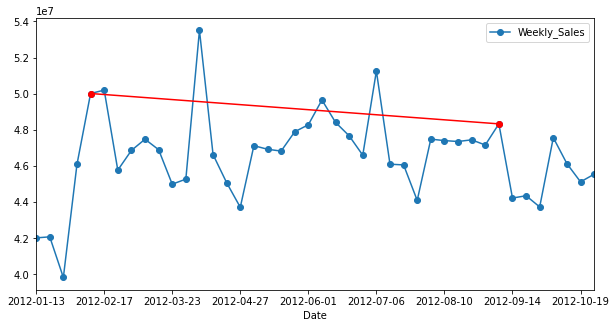

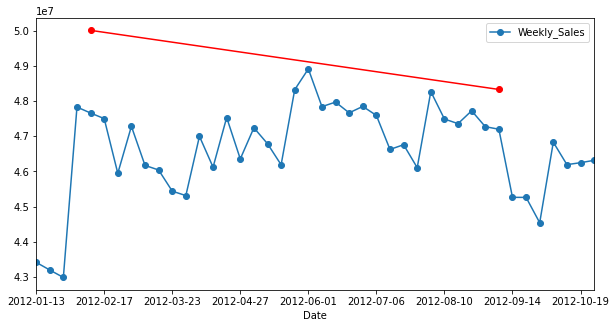

In [39]:
get_graph(actual,result)

In [40]:
x_model.get_booster().get_score(importance_type="weight")

{'f0': 998,
 'f1': 1336,
 'f10': 954,
 'f100': 133,
 'f101': 158,
 'f102': 67,
 'f103': 180,
 'f104': 115,
 'f105': 129,
 'f106': 236,
 'f107': 32,
 'f108': 41,
 'f109': 213,
 'f11': 864,
 'f110': 248,
 'f111': 228,
 'f112': 139,
 'f113': 123,
 'f114': 101,
 'f115': 248,
 'f116': 128,
 'f117': 189,
 'f118': 122,
 'f119': 195,
 'f12': 1378,
 'f120': 157,
 'f121': 145,
 'f122': 221,
 'f123': 219,
 'f124': 211,
 'f125': 54,
 'f126': 4288,
 'f127': 98737,
 'f128': 73042,
 'f129': 6280,
 'f13': 1242,
 'f130': 5050,
 'f131': 7249,
 'f132': 4393,
 'f133': 5460,
 'f134': 95261,
 'f135': 43042,
 'f136': 4417,
 'f137': 3817,
 'f138': 2088,
 'f139': 30005,
 'f14': 1102,
 'f140': 56851,
 'f141': 383,
 'f142': 428,
 'f143': 1701,
 'f144': 1054,
 'f145': 891,
 'f146': 626,
 'f147': 518,
 'f148': 744,
 'f149': 342,
 'f15': 852,
 'f150': 332,
 'f151': 706,
 'f152': 673,
 'f153': 225,
 'f154': 468,
 'f155': 516,
 'f156': 637,
 'f157': 285,
 'f158': 284,
 'f159': 347,
 'f16': 980,
 'f160': 454,
 'f161':

In [1]:

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()

x.field_names = ["Regression",  "Train WMAE","CV WMAE","Test WMAE"]

x.add_row(["Linear Regression", 15743.89, 18670.29, 15794.14])
x.add_row([" ", " ", " ", " "])

x.add_row(["Random Forest Regressor", 5494.46, 5142.77, 5335.56])
x.add_row([" ", " ", " ", " "])

x.add_row(["Xgboost", 2718.51, 2369.00, 2702.84])
x.add_row([" ", " ", " ", " "])

In [2]:
print(x)

+-------------------------+------------+----------+-----------+
|        Regression       | Train WMAE | CV WMAE  | Test WMAE |
+-------------------------+------------+----------+-----------+
|    Linear Regression    |  15743.89  | 18670.29 |  15794.14 |
|                         |            |          |           |
| Random Forest Regressor |  5494.46   | 5142.77  |  5335.56  |
|                         |            |          |           |
|         Xgboost         |  2718.51   |  2369.0  |  2702.84  |
|                         |            |          |           |
+-------------------------+------------+----------+-----------+
